In [1]:
import pandas as pd
import plotly.express as px 
import plotly.graph_objects as go 
import matplotlib.pyplot as plt
import numpy as np



pd.set_option('display.max_columns', None)

data = pd.read_excel('big_12_data.xlsx') 

In [3]:
data.sample(3)

,Rk,School,G,W,L,W%,W.1,L.1,W.2,L.2,W.3,L.3,Unnamed: 12,ORtg,DRtg,NRtg,Unnamed: 16,FG,FGA,FG%,3P,3PA,3P%,eFG%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS,PTS.1,Unnamed: 36,SRS,SOS,Pace
5,6,Kansas,34,23,11,0.676,10,8,15,1,3,7,NaN,107.7,99.6,8.1,NaN,28.2,57.9,0.488,5.7,17.3,0.332,0.538,13.4,18.5,0.721,8.2,36.1,19.0,7.1,3.9,11.7,14.8,75.6,69.9,NaN,16.35,11.32,69.9
6,7,Texas,34,21,13,0.618,9,9,14,4,4,6,NaN,110.1,100.6,9.5,NaN,27.4,58.5,0.469,7.2,20.3,0.355,0.530,13.4,17.6,0.757,10.0,34.7,15.1,7.2,4.4,11.6,17.3,75.4,68.9,NaN,15.91,9.41,68.2
3,4,Texas Tech,34,23,11,0.676,11,7,15,2,4,6,NaN,111.7,103.3,8.4,NaN,25.8,57.1,0.451,8.5,23.6,0.359,0.526,15.2,19.5,0.780,9.9,34.9,14.7,6.0,2.5,11.1,14.9,75.3,69.6,NaN,14.96,9.28,67.2


In [5]:
data.shape

(14, 40)

In [7]:
data.drop(columns=["Unnamed: 12", "Unnamed: 16", "Unnamed: 36", "SRS", "SOS", "Pace"], inplace=True)

In [9]:
data.rename(columns={"W.1": "Conf. W", "L.1": "Conf. L", "W.2": "Home W", "L.2": "Home L", "W.3": "Away W", "L.3": "Away L", "FG": "FGM", "FT": "FTM", "PTS.1": "OPP PTS", "3P": "3PM"}, inplace = True)

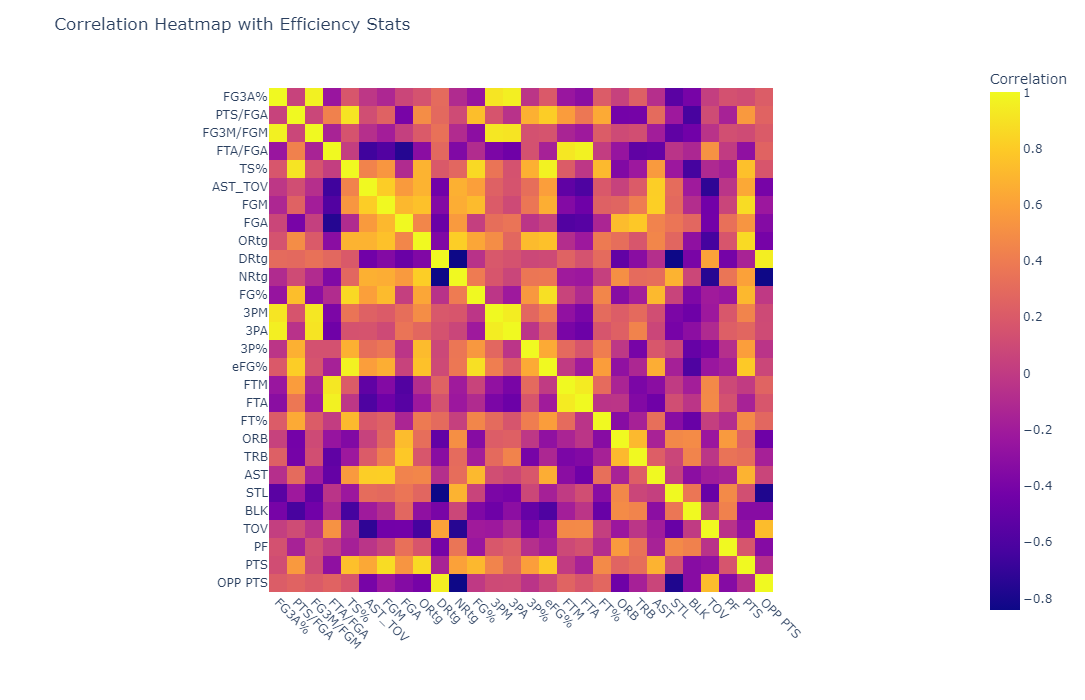

In [31]:

data['FG3A%'] = data['3PA'] / data['FGA']
data['PTS/FGA'] = data['PTS'] / data['FGA']
data['FG3M/FGM'] = data['3PM'] / data['FGM']
data['FTA/FGA'] = data['FTA'] / data['FGA']
data['TS%'] = 0.5 * data['PTS'] / (data['FGA'] + 0.475 * data['FTA'])
data['AST_TOV'] = data['AST'] / data['TOV']

stats = ["FG3A%", "PTS/FGA", "FG3M/FGM", "FTA/FGA", "TS%", "AST_TOV", "FGM", "FGA", "ORtg", "DRtg", "NRtg", "FG%", 
         "3PM", "3PA", "3P%", "eFG%", "FTM", "FTA", "FT%", "ORB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS", "OPP PTS"]

correlation_matrix = data[stats].corr()


fig = px.imshow(correlation_matrix, labels=dict(color="Correlation"), x=correlation_matrix.columns, y=correlation_matrix.columns)
    


fig.update_layout(title="Correlation Heatmap with Efficiency Stats", width=700,height=700)


fig.update_xaxes(tickangle=45, tickmode='linear')
fig.update_yaxes(tickmode='linear')

fig.show()






In [13]:
data

,Rk,School,G,W,L,W%,Conf. W,Conf. L,Home W,Home L,Away W,Away L,ORtg,DRtg,NRtg,FGM,FGA,FG%,3PM,3PA,3P%,eFG%,FTM,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS,OPP PTS,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TS%,AST_TOV
0,1,Houston,37,32,5,0.865,15,3,17,0,7,3,113.6,89.0,24.6,26.5,60.4,0.439,7.7,22.2,0.348,0.503,12.8,18.6,0.687,13.4,37.1,13.1,9.8,4.8,8.9,17.8,73.5,57.6,0.367550,1.216887,0.290566,0.307947,0.530801,1.471910
1,2,Iowa State,37,29,8,0.784,13,5,18,0,5,5,110.9,90.6,20.3,27.1,58.5,0.463,6.6,18.6,0.358,0.520,14.5,20.7,0.702,10.6,33.9,15.7,10.3,3.1,10.5,16.5,75.3,61.5,0.317949,1.287179,0.243542,0.353846,0.550982,1.495238
2,3,Baylor,35,24,11,0.686,11,7,15,2,4,5,117.8,104.2,13.6,27.6,57.2,0.483,8.6,22.1,0.389,0.558,16.5,22.6,0.732,11.4,35.1,14.7,6.7,3.1,12.0,16.5,80.4,71.1,0.386364,1.405594,0.311594,0.395105,0.591742,1.225000
3,4,Texas Tech,34,23,11,0.676,11,7,15,2,4,6,111.7,103.3,8.4,25.8,57.1,0.451,8.5,23.6,0.359,0.526,15.2,19.5,0.780,9.9,34.9,14.7,6.0,2.5,11.1,14.9,75.3,69.6,0.413310,1.318739,0.329457,0.341506,0.567338,1.324324
4,5,BYU,34,23,11,0.676,10,8,16,2,3,7,116.4,100.0,16.4,29.2,63.4,0.460,11.1,32.0,0.348,0.548,11.9,16.1,0.742,11.9,39.5,18.5,5.9,3.0,10.7,17.7,81.4,69.9,0.504732,1.283912,0.380137,0.253943,0.572856,1.728972
5,6,Kansas,34,23,11,0.676,10,8,15,1,3,7,107.7,99.6,8.1,28.2,57.9,0.488,5.7,17.3,0.332,0.538,13.4,18.5,0.721,8.2,36.1,19.0,7.1,3.9,11.7,14.8,75.6,69.9,0.298791,1.305699,0.202128,0.319516,0.566823,1.623932
6,7,Texas,34,21,13,0.618,9,9,14,4,4,6,110.1,100.6,9.5,27.4,58.5,0.469,7.2,20.3,0.355,0.530,13.4,17.6,0.757,10.0,34.7,15.1,7.2,4.4,11.6,17.3,75.4,68.9,0.347009,1.288889,0.262774,0.300855,0.563865,1.301724
7,8,TCU,34,21,13,0.618,9,9,12,4,6,5,110.3,100.2,10.2,28.4,61.4,0.461,6.6,18.6,0.354,0.515,15.7,21.5,0.731,12.7,37.1,16.9,9.0,3.8,12.9,17.4,79.0,71.7,0.302932,1.286645,0.232394,0.350163,0.551580,1.310078
8,9,Kansas State,34,19,15,0.559,8,10,15,3,2,9,102.8,101.3,1.6,24.6,56.4,0.436,7.4,23.2,0.318,0.502,15.6,21.6,0.720,11.1,37.5,14.0,5.9,4.1,14.8,17.5,72.2,71.1,0.411348,1.280142,0.300813,0.382979,0.541554,0.945946
9,10,Oklahoma,32,20,12,0.625,8,10,14,4,3,6,109.4,99.8,9.6,26.1,56.2,0.465,7.5,21.6,0.345,0.531,15.7,21.2,0.743,9.7,35.2,13.3,5.9,3.3,12.5,16.1,75.4,68.8,0.384342,1.341637,0.287356,0.377224,0.568885,1.064000



Select stats by entering the corresponding number:
1: FG3A%
2: PTS/FGA
3: FG3M/FGM (%)
4: FTA/FGA (%)
5: TS%
6: AST/TOV
7: FGM
8: FGA
9: ORtg
10: DRtg
11: NRtg
12: FG%
13: 3PM
14: 3PA
15: 3P%
16: eFG%
17: FTM
18: FTA
19: FT%
20: ORB
21: TRB
22: AST
23: STL
24: BLK
25: TOV
26: Fouls
27: PPG
28: OPP PPG


Enter the number for the X axis:  9
Enter the number for the Y axis:  10


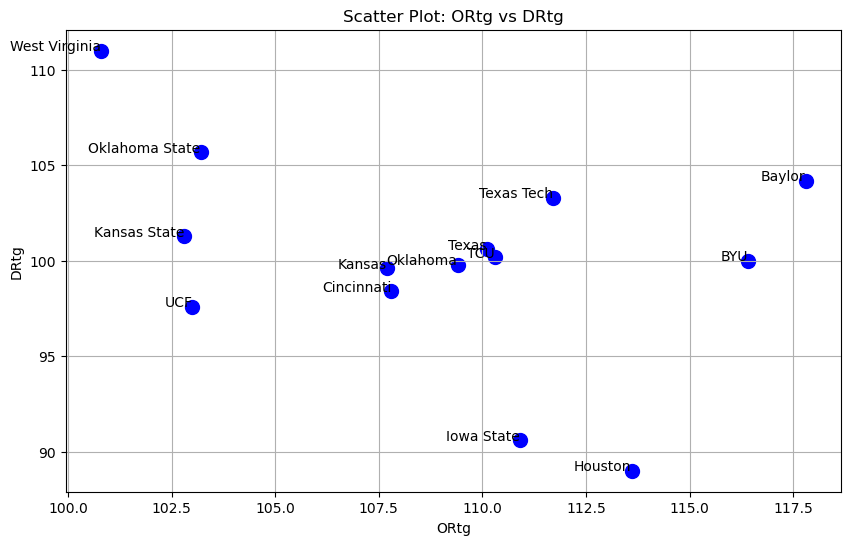

Again? (yes/no):  no


Ok.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "TEAM": ["Houston", "Iowa State", "Baylor", "Texas Tech", "BYU", "Kansas", "Texas", "TCU", "Kansas State", "Oklahoma", "UCF", "Cincinnati", "Oklahoma State", "West Virginia"],
    "ORtg": [113.6, 110.9, 117.8, 111.7, 116.4, 107.7, 110.1, 110.3, 102.8, 109.4,103.0, 107.8, 103.2, 100.8],
    "DRtg": [89.0, 90.6, 104.2, 103.3, 100.0, 99.6, 100.6, 100.2, 101.3, 99.8, 97.6, 98.4, 105.7, 111.0],
    "NRtg": [24.6, 20.3, 13.6, 8.4, 16.4, 8.1, 9.5, 10.2, 1.6, 9.6, 5.4, 9.5, -2.5, -10.2],
    "FGM": [26.5, 27.1, 27.6, 25.8, 29.2, 28.2, 27.4, 28.4, 24.6, 26.1, 24.8, 27.6, 24.8, 24.0],
    "FGA": [60.4, 58.5, 57.2, 57.1, 63.4, 57.9, 58.5, 61.4, 56.4, 56.2, 58.9, 62.4, 56.2, 55.8],
    "FG%": [43.9, 46.3, 48.3, 45.1, 46.0, 48.8, 46.9, 46.1, 43.6, 46.5, 42.0, 44.3, 44.1, 43.0],
    "FT%": [68.7, 70.2, 73.2, 78.0, 74.2, 72.1, 75.7, 73.1, 72.0, 74.3, 70.1, 68.8, 69.7, 70.5],
    "ORB":[13.4, 10.6, 11.4, 9.9, 11.9, 8.2, 10.0, 12.7, 11.1, 9.7, 12.4, 13.3, 9.2, 9.2],
    "AST/TOV": [1.47, 1.50, 1.23, 1.32, 1.73, 1.62, 1.30, 1.31, 0.95, 1.06, 0.91, 1.22, 1.04, 1.02],
    "TRB": [37.1, 33.9, 35.1, 34.9, 39.5, 36.1, 34.7, 37.1, 37.5, 35.2, 37.7, 39.5, 33.7, 33.8],
    "FTA/FGA (%)": [30.8, 35.3, 39.5, 34.1, 25.3, 31.9, 30.1, 35.0, 38.3, 37.7, 37.2, 27.6, 34.0, 37.1],
    "AST": [13.1, 15.7, 14.7, 14.7, 18.5, 19.0, 15.1, 16.9, 14.0, 13.3, 11.4, 14.6, 13.4, 13.0],
    "FG3M/FGM (%)": [29.1, 24.4, 31.1, 32.9, 38.0, 20.2, 26.3, 23.2, 30.1, 28.7, 27.4, 27.5, 32.7, 30.4],
    "PTS/FGA": [1.22, 1.29, 1.41, 1.32, 1.28, 1.31, 1.29, 1.29, 1.28, 1.34, 1.22, 1.97, 1.26, 1.25],
    "STL": [9.8, 10.3, 6.7, 6.0, 5.9, 7.1, 7.2, 9.0, 5.9, 5.9, 8.7, 6.5, 6.3, 6.4],
    "FG3A%": [36.8, 31.8, 38.6, 41.3, 50.4, 29.8, 34.7, 30.3, 41.1, 38.4, 36.0, 36.7, 43.2, 37.2],
    "OPP PPG": [57.6, 61.5, 71.1, 69.6, 69.9, 69.9, 68.9, 71.7, 71.1, 68.8, 67.9, 68.2, 72.2, 76.8],
    "BLK": [4.8, 3.1, 3.1, 2.5, 3.0, 3.9, 4.4, 3.8, 4.1, 3.3, 5.0, 4.4, 2.9, 3.6],
    "Fouls":[17.8, 16.5, 16.5, 14.9, 17.7, 14.8, 17.3, 17.4, 17.5, 16.1, 18.2, 15.0, 16.0, 15.2],
    "TOV": [8.9, 10.5, 12.0, 11.1, 10.7, 11.7, 11.6, 12.9, 14.8, 12.5, 12.5, 12.0, 12.9, 12.7],
    "3PM": [7.7, 6.6, 8.6, 8.5, 11.1, 5.7, 7.2, 6.6, 7.4, 7.5, 6.8, 7.6, 8.1, 7.3],
    "3PA":[22.2, 18.6, 22.1, 23.6, 32.0, 17.3, 20.3, 18.6, 23.2, 21.6, 21.2, 22.9, 24.3, 20.8],
    "3P%": [34.8, 35.8, 38.9, 35.9, 34.8, 33.2, 35.5, 35.4, 31.8, 34.5, 32.2, 33.0, 33.4, 34.9],
    "eFG%": [50.3, 52.0, 55.8, 52.6, 54.8, 53.8, 53.0, 51.5, 50.2, 53.1, 47.8, 50.3, 51.3, 49.5],
    "FTM":[12.8, 14.5, 16.5, 15.2, 11.9, 13.4, 13.4, 15.7, 15.6, 15.7, 15.4, 11.9, 13.3, 14.6],
    "FTA":[18.6, 20.7, 22.6, 19.5, 16.1, 18.5, 17.6, 21.5, 21.6, 21.2, 21.9, 17.2, 19.1, 20.7],
    "PPG":[73.5, 75.3, 80.4, 75.3, 81.4, 75.6, 75.4, 79.0, 72.2, 75.4, 71.7, 74.7, 71.0, 69.8],
    "TS%": [53.1, 55.1, 59.2, 56.7, 57.3, 56.7, 56.4, 55.2, 54.2, 56.7, 51.7, 52.9, 54.4, 53.2],
    
})


stats = ["FG3A%", "PTS/FGA", "FG3M/FGM (%)", "FTA/FGA (%)", "TS%", "AST/TOV", "FGM", "FGA", "ORtg", "DRtg", "NRtg", "FG%", 
         "3PM", "3PA", "3P%", "eFG%", "FTM", "FTA", "FT%", "ORB", "TRB", "AST", "STL", "BLK", "TOV", "Fouls", "PPG", "OPP PPG"]

def display_plot(x_axis, y_axis):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[x_axis], df[y_axis], color='blue', s=100)
    
    for i, team in enumerate(df["TEAM"]):
        plt.text(df[x_axis].iloc[i], df[y_axis].iloc[i], team, fontsize=10, ha='right')
    
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(f'Scatter Plot: {x_axis} vs {y_axis}')
    plt.grid(True)
    plt.show()

print("\nSelect stats by entering the corresponding number:")
for i, stat in enumerate(stats):
    print(f"{i + 1}: {stat}")

# Main loop to continuously ask for user input
while True:
    # Prompt the user to enter the indices for x and y axes
    try:
        x_idx = int(input("Enter the number for the X axis: ")) - 1
        y_idx = int(input("Enter the number for the Y axis: ")) - 1
    except ValueError:
        print("Please enter valid numbers.")
        continue
    
    # Ensure the user input is valid
    if x_idx < 0 or x_idx >= len(stats) or y_idx < 0 or y_idx >= len(stats):
        print("Error: One or both of the selected indices are not valid.")
        continue

    x_axis = stats[x_idx]
    y_axis = stats[y_idx]
    
    # Display the scatter plot
    display_plot(x_axis, y_axis)
    
    # Ask if the user wants to continue or exit
    cont = input("Again? (yes/no): ").strip().lower()
    if cont != 'yes':
        print("Ok.")
        break
